In [1]:
import tensorflow as tf
import random
import pandas as pd
import numpy
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import cv2
import math

Y = a*X^2 + b (Parabolas)

In [2]:
X = []
Y = []
for i in range(10):
    a = random.randint(2,100)
    X.append(a)
    Y.append(a**2 + 5)
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
print(X.iloc[0])
print(Y.iloc[0])

0    90
Name: 0, dtype: int64
0    8105
Name: 0, dtype: int64


In [3]:
inp = keras.Input(shape = (1,))
i = keras.layers.Dense(units=6,activation='tanh')(inp)
i = keras.layers.Dense(units=6,activation='tanh')(i)
i = keras.layers.Dense(units=6,activation='tanh')(i)
out = keras.layers.Dense(units=1)(i)
model = keras.Model(inputs = inp, outputs = out, name = 'parabola')
model.summary()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mae')

Model: "parabola"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
loss = model.fit(X,Y, batch_size=10,validation_data=(X,Y), epochs= 1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3100.1829 - val_loss: 3100.1558
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3100.1560 - val_loss: 3100.1296
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3100.1296 - val_loss: 3100.1042
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3100.1045 - val_loss: 3100.0796
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3100.0796 - val_loss: 3100.0544
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3100.0544 - val_loss: 3100.0298
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3100.0298 - val_loss: 3100.0046
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3100.0049 - val_loss: 3099.9802
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3099.9802 - val_loss: 3099.9556
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3099.9556 - val_loss: 3099.9309
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3099.9312 - val_loss: 3099.9062

In [7]:
y = model.predict(pd.DataFrame([0]))
print(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[10.081391]]


SUM(X) = Y

In [6]:
X = []
Y = []

for i in range(1000):
    x = [random.uniform(-1000,1000) for j in range(10)]
    y = [x[0]+x[j] for j in range(1,len(x))]
    X.append(x)
    Y.append(y)
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
# X.head()
# Y.head()

In [7]:
inp = keras.Input(shape=(10,))
i = keras.layers.Dense(units=9,)(inp)
model = keras.Model(inputs=inp, outputs=i,name='sum')
model.summary()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0045), loss='mse')

Model: "sum"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 9)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99 (396.00 B)

 Trainable params: 99 (396.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
loss = model.fit(X,Y, batch_size=1000,epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - loss: 1155578.0000
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1142301.5000
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1129165.6250
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1116172.8750
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1103324.2500
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1090620.0000
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1078060.6250
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1065646.7500
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1053378.3750
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1041255.0000
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1029276.2500
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1017441.5625
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1005750.0625
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 994201.2500
E

In [9]:
print(model.predict(pd.DataFrame([0,1,1,1,1,1,1,1,1,1]).T))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[ 0.26209605  0.8736831  -0.24823582 -0.24825561  0.71811205 -0.34000337
   0.8265507   0.5363728   2.0576694 ]]


2.2691e-04 or less is acceptable

EXP(X) = Y

In [10]:
X = []
Y = []
for i in range(5000):
    a = random.uniform(-5,5)
    X.append(a)
    Y.append(math.exp(a))
X = pd.DataFrame(X,columns=['X'])
Y = pd.DataFrame(Y,columns=['Y'])
print(X.iloc[0])
print(Y.iloc[0])

X    4.94249
Name: 0, dtype: float64
Y    140.118707
Name: 0, dtype: float64


TESTING SPACE 

In [11]:
X = []
Y = []
for i in range(50000):
    a = random.uniform(-10,10)
    X.append(a)
    Y.append(math.exp(a))
X = pd.DataFrame(X,columns=['X'])
Y = pd.DataFrame(Y,columns=['Y'])
print(X.iloc[0])
print(Y.iloc[0])

X    3.622631
Name: 0, dtype: float64
Y    37.435931
Name: 0, dtype: float64


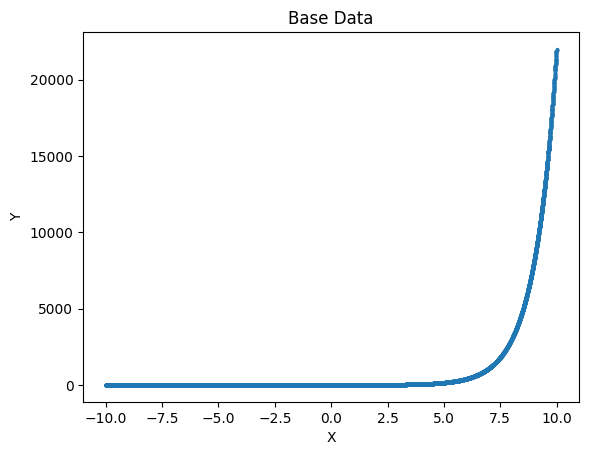

In [12]:
df = pd.concat([X,Y],axis=1)
df.head()
df.plot(kind='scatter',x='X',y='Y', s=2)
plt.title('Base Data')
# plt.show()
plt.savefig('C:/Projects/AI-learning/Neural Network/From-scratch/base_Data.png')
img = cv2.imread('C:/Projects/AI-learning/Neural Network/From-scratch/base_Data.png')
# cv2.imshow('image',img)
height, width, layers = img.shape
# print(df.shape)


In [13]:
inp = keras.Input(shape = (1,))
i = keras.layers.Dense(units=5,activation='tanh')(inp)
i = keras.layers.Dense(units=5,activation='tanh')(i)
i = keras.layers.Dense(units=5,activation='tanh')(i)
i = keras.layers.Dense(units=5,activation='tanh')(i)
i = keras.layers.Dense(units=5,activation='tanh')(i)
# i = keras.layers.Dense(units=1,activation='tanh')(i)
# i = keras.layers.Dense(units=5,activation='relu')(i)
# i = keras.layers.Dense(units=3,activation='relu')(i)
i = keras.layers.Dense(units=1)(i)
out = keras.layers.Dense(units=1)(i)
model = keras.Model(inputs = inp, outputs = out, name = 'Cube')
model.summary()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0045), loss='mse')

Model: "Cube"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138 (552.00 B)

 Trainable params: 138 (552.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
err = []
time = []
fourcc = cv2.VideoWriter_fourcc(*'XVID')
# video = cv2.VideoWriter('C:/Projects/AI-learning/Neural Network/From-scratch/Traning_steps_tannh.avi',fourcc,30,(width,height))
er_vid = cv2.VideoWriter('C:/Projects/AI-learning/Neural Network/From-scratch/error_steps_tanh.avi',fourcc,30,(width,height))
for i in range(360):
    loss = model.fit(X,Y, batch_size=50000,validation_data=(X,Y), epochs= 15)
    print("STEP: ",i)
    y = pd.DataFrame(model.predict(X),columns=['y'])
    df = pd.concat([X,y],axis=1)
    # df.head()
    # os.system('clear')
    err.append(loss.history['loss'][-1])
    time.append(i)
    plt.scatter(time,err,s=1)
    plt.savefig('C:/Projects/AI-learning/Neural Network/From-scratch/error.jpg')
    eri = cv2.imread('C:/Projects/AI-learning/Neural Network/From-scratch/error.jpg')
    er_vid.write(eri)
    plt.clf()
    df.plot(kind='scatter',x='X',y='y',s = 1.5)
    plt.savefig('C:/Projects/AI-learning/Neural Network/From-scratch/training.jpg')
    tri = cv2.imread('C:/Projects/AI-learning/Neural Network/From-scratch/training.jpg')
    video.write(tri)
    plt.clf()
    # plt.title('Trained')
    # plt.show()
    # print(df.shape)
# video.release()
# er_vid.release()

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11545365.0000 - val_loss: 11545152.0000
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 11545153.0000 - val_loss: 11544936.0000
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 11544936.0000 - val_loss: 11544717.0000
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11544715.0000 - val_loss: 11544494.0000
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 11544494.0000 - val_loss: 11544270.0000
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11544270.0000 - val_loss: 11544044.0000
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 11544044.0000 - val_loss: 11543817.0000
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 11543817.0000 - val_loss: 11543589.0000
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11543589.0000 - val_loss: 11543361.0000
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11543360.0000 - val_loss: 11543131.0000
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━

In [18]:
print(type(loss.history['loss'][-1]))

<class 'float'>


In [150]:
video.release()
er_vid.release()

In [74]:
y = model.predict(pd.DataFrame([10]))
print(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[139.77525]]
